In [32]:
# importing libraries

import pandas as pd
import seaborn as sns

The dataset has been downloaded from https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

In [2]:
data = pd.read_csv("day.csv")

data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


The unnecessary columns are removed.

In [5]:
data = data.drop(["instant", "dteday", "mnth", "weekday", "atemp", "casual", "registered"], axis=1)

data.head()

,season,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,0,0,2,0.344167,0.805833,0.160446,985
1,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1,0,0,1,1,0.196364,0.437273,0.248309,1349
3,1,0,0,1,1,0.200000,0.590435,0.160296,1562
4,1,0,0,1,1,0.226957,0.436957,0.186900,1600


The "days_since_2011" column is added, as given in the book, to account for the trend, in this case that the bike rental service became more popular over time.

In [7]:
data["days_since_2011"] = data.index

data.head()

,season,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,days_since_2011
0,1,0,0,0,2,0.344167,0.805833,0.160446,985,0
1,1,0,0,0,2,0.363478,0.696087,0.248539,801,1
2,1,0,0,1,1,0.196364,0.437273,0.248309,1349,2
3,1,0,0,1,1,0.200000,0.590435,0.160296,1562,3
4,1,0,0,1,1,0.226957,0.436957,0.186900,1600,4


In [8]:
data.tail()

,season,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,days_since_2011
726,1,1,0,1,2,0.254167,0.652917,0.350133,2114,726
727,1,1,0,1,2,0.253333,0.590000,0.155471,3095,727
728,1,1,0,0,2,0.253333,0.752917,0.124383,1341,728
729,1,1,0,0,1,0.255833,0.483333,0.350754,1796,729
730,1,1,0,1,2,0.215833,0.577500,0.154846,2729,730


All the relevant features are present in correct format, so the dataset is saved.

In [30]:
# saving the dataset

data.to_csv('Bike_Sharing_Dataset_Cleaned.csv')

# EDA

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 10 columns):
season             731 non-null int64
yr                 731 non-null int64
holiday            731 non-null int64
workingday         731 non-null int64
weathersit         731 non-null int64
temp               731 non-null float64
hum                731 non-null float64
windspeed          731 non-null float64
cnt                731 non-null int64
days_since_2011    731 non-null int64
dtypes: float64(3), int64(7)
memory usage: 57.2 KB


No missing values present.

In [12]:
data.describe()

,season,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,days_since_2011
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,0.028728,0.683995,1.395349,0.495385,0.627894,0.190486,4504.348837,365.000000
std,1.110807,0.500342,0.167155,0.465233,0.544894,0.183051,0.142429,0.077498,1937.211452,211.165812
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,22.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,1.000000,0.337083,0.520000,0.134950,3152.000000,182.500000
50%,3.000000,1.000000,0.000000,1.000000,1.000000,0.498333,0.626667,0.180975,4548.000000,365.000000
75%,3.000000,1.000000,0.000000,1.000000,2.000000,0.655417,0.730209,0.233214,5956.000000,547.500000
max,4.000000,1.000000,1.000000,1.000000,3.000000,0.861667,0.972500,0.507463,8714.000000,730.000000


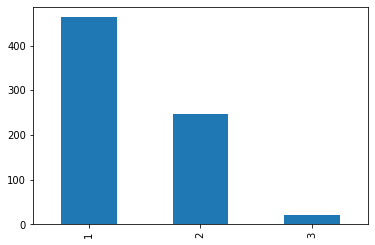

In [17]:
data["weathersit"].value_counts().plot(kind='bar')

In [18]:
data["weathersit"].value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

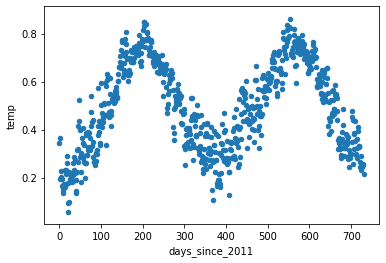

In [22]:
data.plot.scatter(x='days_since_2011', y="temp")

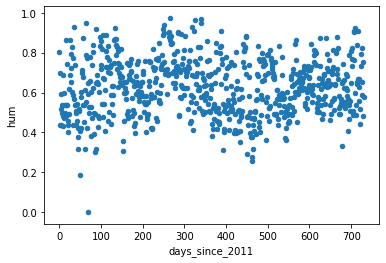

In [23]:
data.plot.scatter(x='days_since_2011', y="hum")

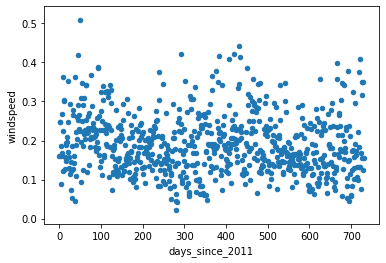

In [24]:
data.plot.scatter(x='days_since_2011', y="windspeed")

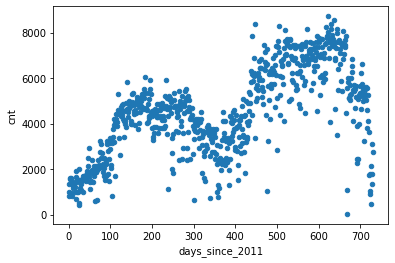

In [25]:
data.plot.scatter(x='days_since_2011', y="cnt")

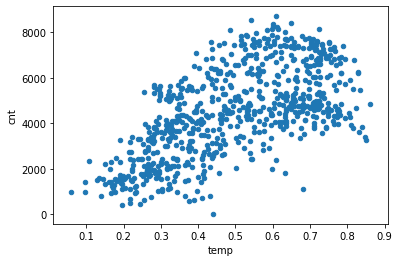

In [26]:
data.plot.scatter(x='temp', y="cnt")

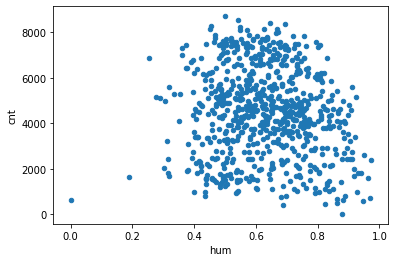

In [27]:
data.plot.scatter(x='hum', y="cnt")

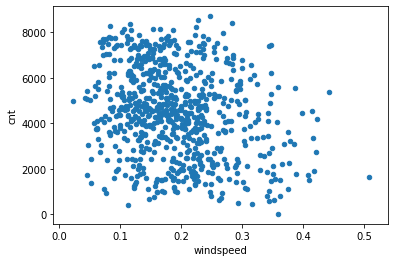

In [28]:
data.plot.scatter(x='windspeed', y="cnt")

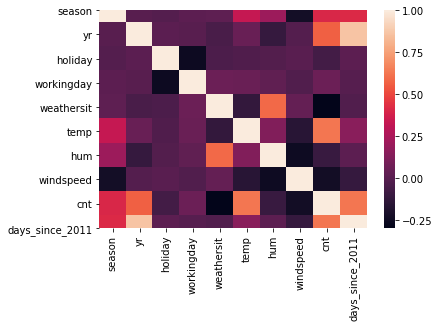

In [34]:
sns.heatmap(data.corr())